In [1]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('results/player_and_careerlength_groupbyyear2.csv')

In [3]:
X = data.fillna(0).drop(['year', 'playerID', 'GS', 'rounded_age', 'rounded_position', 'weight_y', \
                         'height_y', 'team_gm', 'height_x', 'weight_x', 'firstseason', 'lastseason', 'PostGS', 'note', 'PostGP',
 'PostMinutes',
 'PostPoints',
 'PostoRebounds',
 'PostdRebounds',
 'PostRebounds',
 'PostAssists',
 'PostSteals',
 'PostBlocks',
 'PostTurnovers',
 'PostPF',
 'PostfgAttempted',
 'PostfgMade',
 'PostftAttempted',
 'PostftMade',
 'PostthreeAttempted',
 'PostthreeMade',
                        'player_efficiency'], axis=1)
y = data.player_efficiency

In [4]:
y

0        5.705050
1        9.612481
2       12.065441
3       18.542663
4       19.222878
5       18.971620
6       18.489922
7       18.052547
8       17.112079
9        8.864285
10       9.521265
11      14.019156
12      11.531899
13      21.747290
14      20.878745
15      19.845285
16      20.190524
17      19.168474
18      21.477261
19      11.414045
20      13.298998
21      13.255633
22      12.269581
23      16.130319
24      11.824724
25      15.844996
26      14.956890
27      15.840963
28      13.349381
29      11.203048
          ...    
1139    14.465308
1140    15.430351
1141    15.179984
1142    14.662616
1143    14.214836
1144    12.858267
1145    14.346611
1146    14.919186
1147    11.686681
1148    13.786188
1149     7.714767
1150    13.696807
1151    10.326948
1152     9.312553
1153    13.802615
1154     6.761362
1155    14.471076
1156    13.647239
1157    11.685316
1158    12.048111
1159    14.570860
1160    14.539914
1161    14.129816
1162    13.597633
1163    13

In [5]:
#Create mean table
grouped = X.groupby(['playerID', 'year'])
grouped.agg([np.mean]).to_csv('results/player_year_mean.csv')

KeyError: 'playerID'

In [31]:
#Create mean table for player per career
player_career_meanX = data.groupby(['playerID']).agg([np.mean]).fillna(0).drop(['per', 'GS', 'rounded_age', 'rounded_position', 'weight_y', \
                         'height_y', 'team_gm', 'height_x', 'weight_x', 'firstseason', 'lastseason', 'PostGS', 'note', 'PostGP',
 'PostMinutes',
 'PostPoints',
 'PostoRebounds',
 'PostdRebounds',
 'PostRebounds',
 'PostAssists',
 'PostSteals',
 'PostBlocks',
 'PostTurnovers',
 'PostPF',
 'PostfgAttempted',
 'PostfgMade',
 'PostftAttempted',
 'PostftMade',
 'PostthreeAttempted',
 'PostthreeMade'], axis=1)#.to_csv('results/player_career_mean.csv')
player_career_meany = data.groupby(['playerID']).agg([np.mean]).fillna(0).per

In [6]:
sum_of_cols = pd.DataFrame(X.sum()).T
# Select columns that sum up to 100 or do not have the word post in it
reindexed_cols = pd.DataFrame((X.append(sum_of_cols, ignore_index=True)[:1169] / X.append(sum_of_cols, ignore_index=True).iloc[1169] * 100).sum() == 0).T
rejected_cols = []
for colname, colvalue in zip(reindexed_cols, reindexed_cols.values.tolist()[0]):
    if colvalue or 'post' in colname.lower():
        rejected_cols += [colname]
        
rejected_cols

[]

In [9]:
# Select columns that sum up to 100 or do not have the word post in it
sum_of_cols = pd.DataFrame(X.sum()).T
reindexed_cols = pd.DataFrame((X.append(sum_of_cols, ignore_index=True)[:1169] / X.append(sum_of_cols, ignore_index=True).iloc[1169] * 100))
reindexed_cols.to_csv('results/clean_playerdata.csv', index=False)

In [10]:
playerX = reindexed_cols.fillna(0).drop(['per'], axis=1)[:1169]
playery = reindexed_cols.per[:1169]
playerX = X#.fillna(0).drop(['per'], axis=1)
playery = y

# playerX = player_career_meanX
# playery = player_career_meany.reset_index(drop=True)

In [11]:
# #############################################################################
# Fit regression model
clf = SVR(C=100, epsilon=0.2)
y_clf = clf.fit(playerX, playery.values.tolist()).predict(playerX)

In [157]:
# pd.DataFrame({'test':y_clf})

In [117]:
# #############################################################################
# Fit regression model
svr_lin = SVR(kernel='linear', C=1e3)
y_lin = svr_lin.fit(playerX, playery.values.tolist()).predict(playerX)
# y_lin.score(playerX, playery), y_lin.predict(playerX)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(playerX, playery.values.tolist()).predict(playerX)
# y_rbf.score(playerX, playery.ravel()), svr_rbf.predict(playerX)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [134]:
from sklearn.cross_validation import cross_val_predict
pd.DataFrame({'test':cross_val_predict(estimator=svr_rbf, X=X, y=y, cv=50)})

,test
0,13.593123
1,13.593123
2,13.593123
3,13.593123
4,13.593123
5,13.593123
6,13.593123
7,13.593123
8,13.593123
9,13.593123


In [141]:
# #############################################################################
# Fit regression model
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_poly = svr_poly.fit(playerX, playery.ravel()).predict(playerX)
# y_poly.score(playerX, playery.values.tolist()), svr_poly.predict(playerX)

ValueError: x and y must have same first dimension, but have shapes (214,) and (1169,)

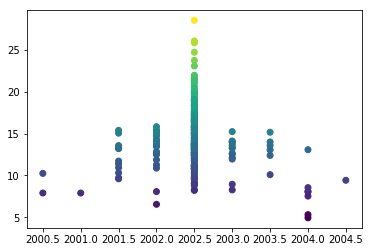

In [159]:
# #############################################################################
# Look at the results
cols = playerX.columns.tolist()
for n in range(len(cols)):
    X = [value for value in playerX.values[:, n]]
    lw = 2
    if 'per' !=  cols[n]:
        plt.scatter(X, playery.values.tolist(), c=playery.values.tolist(), label='data')
        plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
        plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#         plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
        plt.plot(X, y_clf, color='blue', lw=lw, label='CLF model')
        plt.xlabel('data')
        plt.ylabel('target')
        plt.title('Support Vector Regression for: ' + cols[n])
        plt.legend()
        plt.show()
#     break

In [76]:
X2 = [[[26.25, 33.44],
 [25.64, 33.44],
 [25.1, 33.44],
 [27.039999999999996, 33.44],
 [26.024999999999995, 33.44],
 [28.039999999999996, 33.44],
 [31.315999999999995, 33.44]]]

y2 = y[:7]
y2

0    12.6
1     5.8
2     5.3
3    20.2
4    19.1
5    19.8
6    19.9
Name: per, dtype: float64

In [154]:
y_rbf2 = svr_rbf.fit(X2, y2).predict(X2)
plt.scatter(X2, y2, color='darkorange', label='data')
plt.plot(X2, y_rbf2, color='navy', lw=lw, label='RBF model')

ValueError: Found array with dim 3. Estimator expected <= 2.

In [144]:
# Tuning of parameters for regression by cross-validation
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
K = 15               # Number of cross valiations

scorer = make_scorer(mean_squared_error, greater_is_better=False)
# Parameters for tuning
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
svr = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K, scoring=scorer)
svr.fit(X, y)

# Checking the score for all parameters
print("Grid scores on training set:")
means = svr.cv_results_['mean_test_score']
stds = svr.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svr.cv_results_['params']):
    print("mean %0.3f std (+/-%0.03f) for %r"% (mean, std * 2, params))

Tuning hyper-parameters
Grid scores on training set:
mean -21.453 std (+/-13.557) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
mean -21.457 std (+/-13.562) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
mean -21.457 std (+/-13.562) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
mean -21.457 std (+/-13.562) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
mean -21.457 std (+/-13.562) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
mean -21.457 std (+/-13.562) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
mean -21.457 std (+/-13.562) for {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}
mean -21.457 std (+/-13.562) for {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}
mean -21.446 std (+/-13.223) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
mean -21.468 std (+/-13.262) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
mean -21.468 std (+/-13.262) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
mean -21.468 std (+/-13.262) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
mean -21.468 std (+/-13.262) for {'C': 10, 'gamma': 0.2

In [160]:
# # Working parameters
# svr = SVR(kernel='rbf', C=100, gamma = 0.0001, epsilon = 0.01)
# y_rbf = svr.fit(X, y).predict(X)

# # Plotting
# # plt.figure(1)
# plt.scatter(X, y, color='darkorange', label='data')
# plt.plot(X, y_rbf, c = 'navy', label = 'Predicted')
# plt.legend()

# # Checking prediction error
# print("Mean squared error: %.2f" % mean_squared_error(y, y_rbf))

In [139]:
clf.support_vectors_

array([[ 0.  ,  1.  , 29.  , ...,  2.  , 25.25,  2.  ],
       [ 1.  ,  1.5 , 12.  , ...,  2.  , 26.25,  3.  ],
       [ 2.  ,  1.  , 14.  , ...,  2.  , 27.25,  4.  ],
       ...,
       [ 7.  ,  1.  , 54.  , ...,  4.  , 27.14,  7.  ],
       [ 8.  ,  1.  , 72.  , ...,  4.  , 28.14,  8.  ],
       [ 9.  ,  1.  , 80.  , ...,  4.  , 23.6 ,  0.  ]])